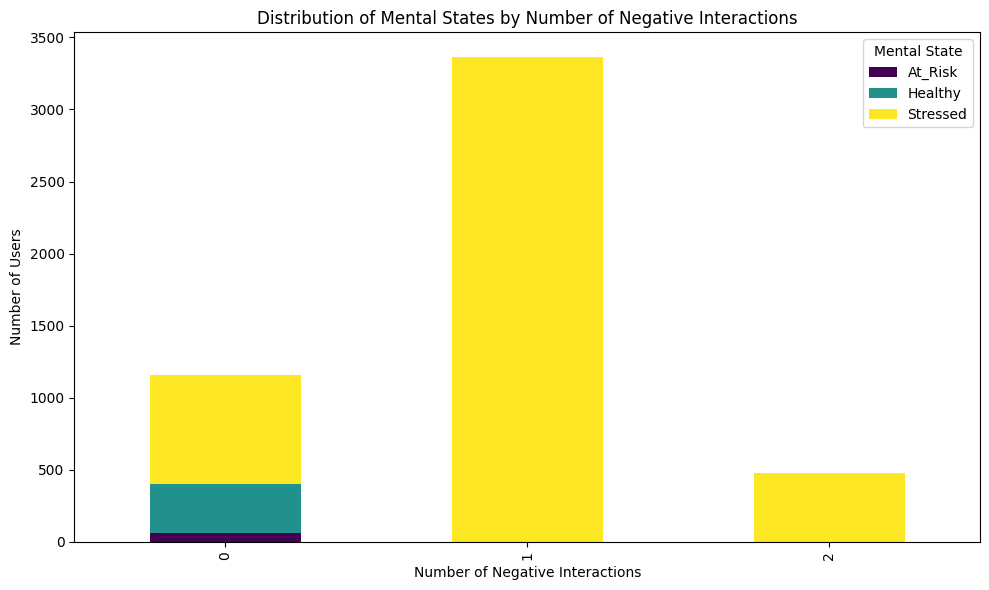

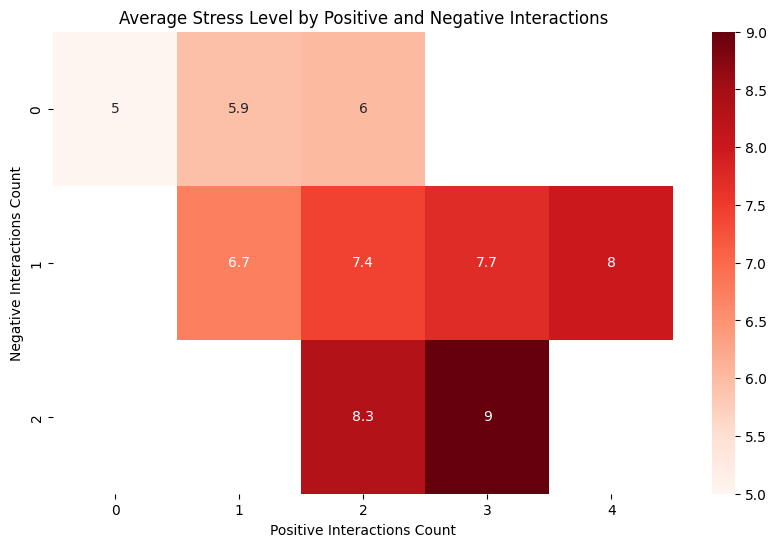

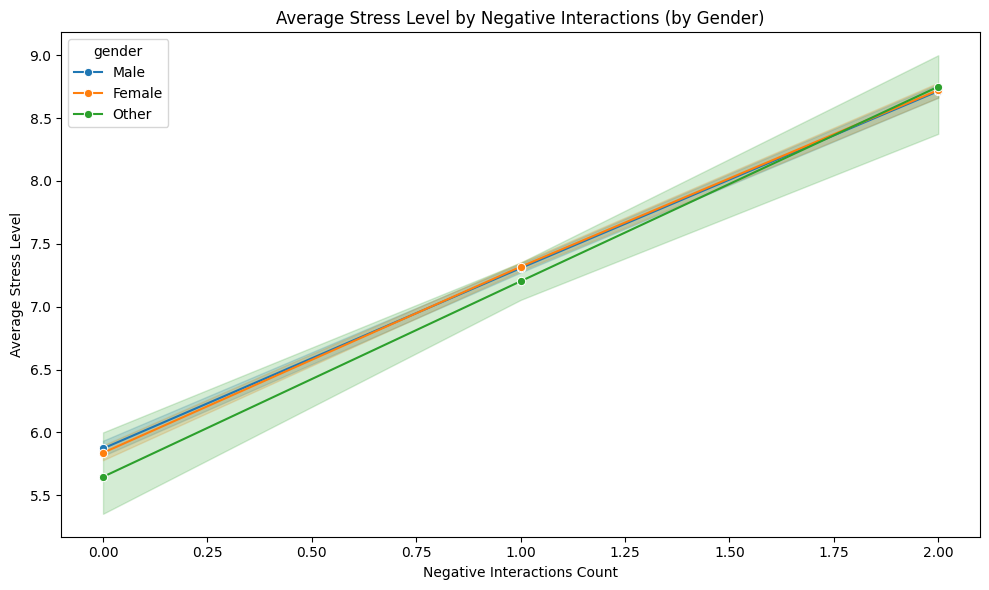

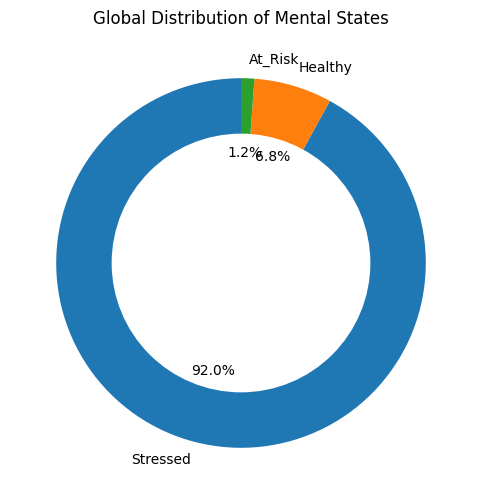

In [2]:
# 1. Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create a folder 
os.makedirs("social_interaction", exist_ok=True)

# 2. Load Dataset
df = pd.read_csv("/kaggle/input/mental-health-social-media-correct/mental_health_social_media_correct.csv")

# 3. Visualization 1:
#    Distribution of Mental States by Negative Interactions

pivot = df.pivot_table(
    index='negative_interactions_count',
    columns='mental_state',
    values='person_name',
    aggfunc='count',
    fill_value=0
)

pivot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')

plt.title("Distribution of Mental States by Number of Negative Interactions")
plt.xlabel("Number of Negative Interactions")
plt.ylabel("Number of Users")
plt.legend(title="Mental State")
plt.tight_layout()

plt.savefig("social_interaction/mental_state_by_negative_interactions.png", dpi=300, bbox_inches='tight')
plt.show()

# 4. Visualization 2:
#    Heatmap - Stress Level by Positive & Negative Interactions

heat = df.groupby(
    ['negative_interactions_count', 'positive_interactions_count']
)['stress_level'].mean().unstack()

plt.figure(figsize=(10,6))
sns.heatmap(heat, annot=True, cmap='Reds')

plt.title("Average Stress Level by Positive and Negative Interactions")
plt.xlabel("Positive Interactions Count")
plt.ylabel("Negative Interactions Count")

plt.savefig("social_interaction/stress_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

# 5. Visualization 3:
#    Stress Level by Negative Interactions (by Gender)

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    x='negative_interactions_count',
    y='stress_level',
    hue='gender',
    marker='o'
)

plt.title("Average Stress Level by Negative Interactions (by Gender)")
plt.xlabel("Negative Interactions Count")
plt.ylabel("Average Stress Level")
plt.tight_layout()

plt.savefig("social_interaction/stress_by_gender.png", dpi=300, bbox_inches='tight')
plt.show()


# 6. Visualization 4:
#    Global Distribution of Mental States (Donut Chart)

counts = df['mental_state'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Global Distribution of Mental States")

# Create donut 
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.savefig("social_interaction/mental_state_distribution.png", dpi=300, bbox_inches='tight')
plt.show()
